In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [504]:
# Load Dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [505]:
# Decription of diabetes dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [506]:
# Dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [507]:
# Summary
print('SUMMARY')
df.info()

#check missing values
print('MISSING VALUES')
df.isnull().sum()


SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
MISSING VALUES


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [508]:
#check duplicates
print('DUPLICATES')
df.duplicated().sum()

DUPLICATES


np.int64(0)

In [509]:
# statistic description
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


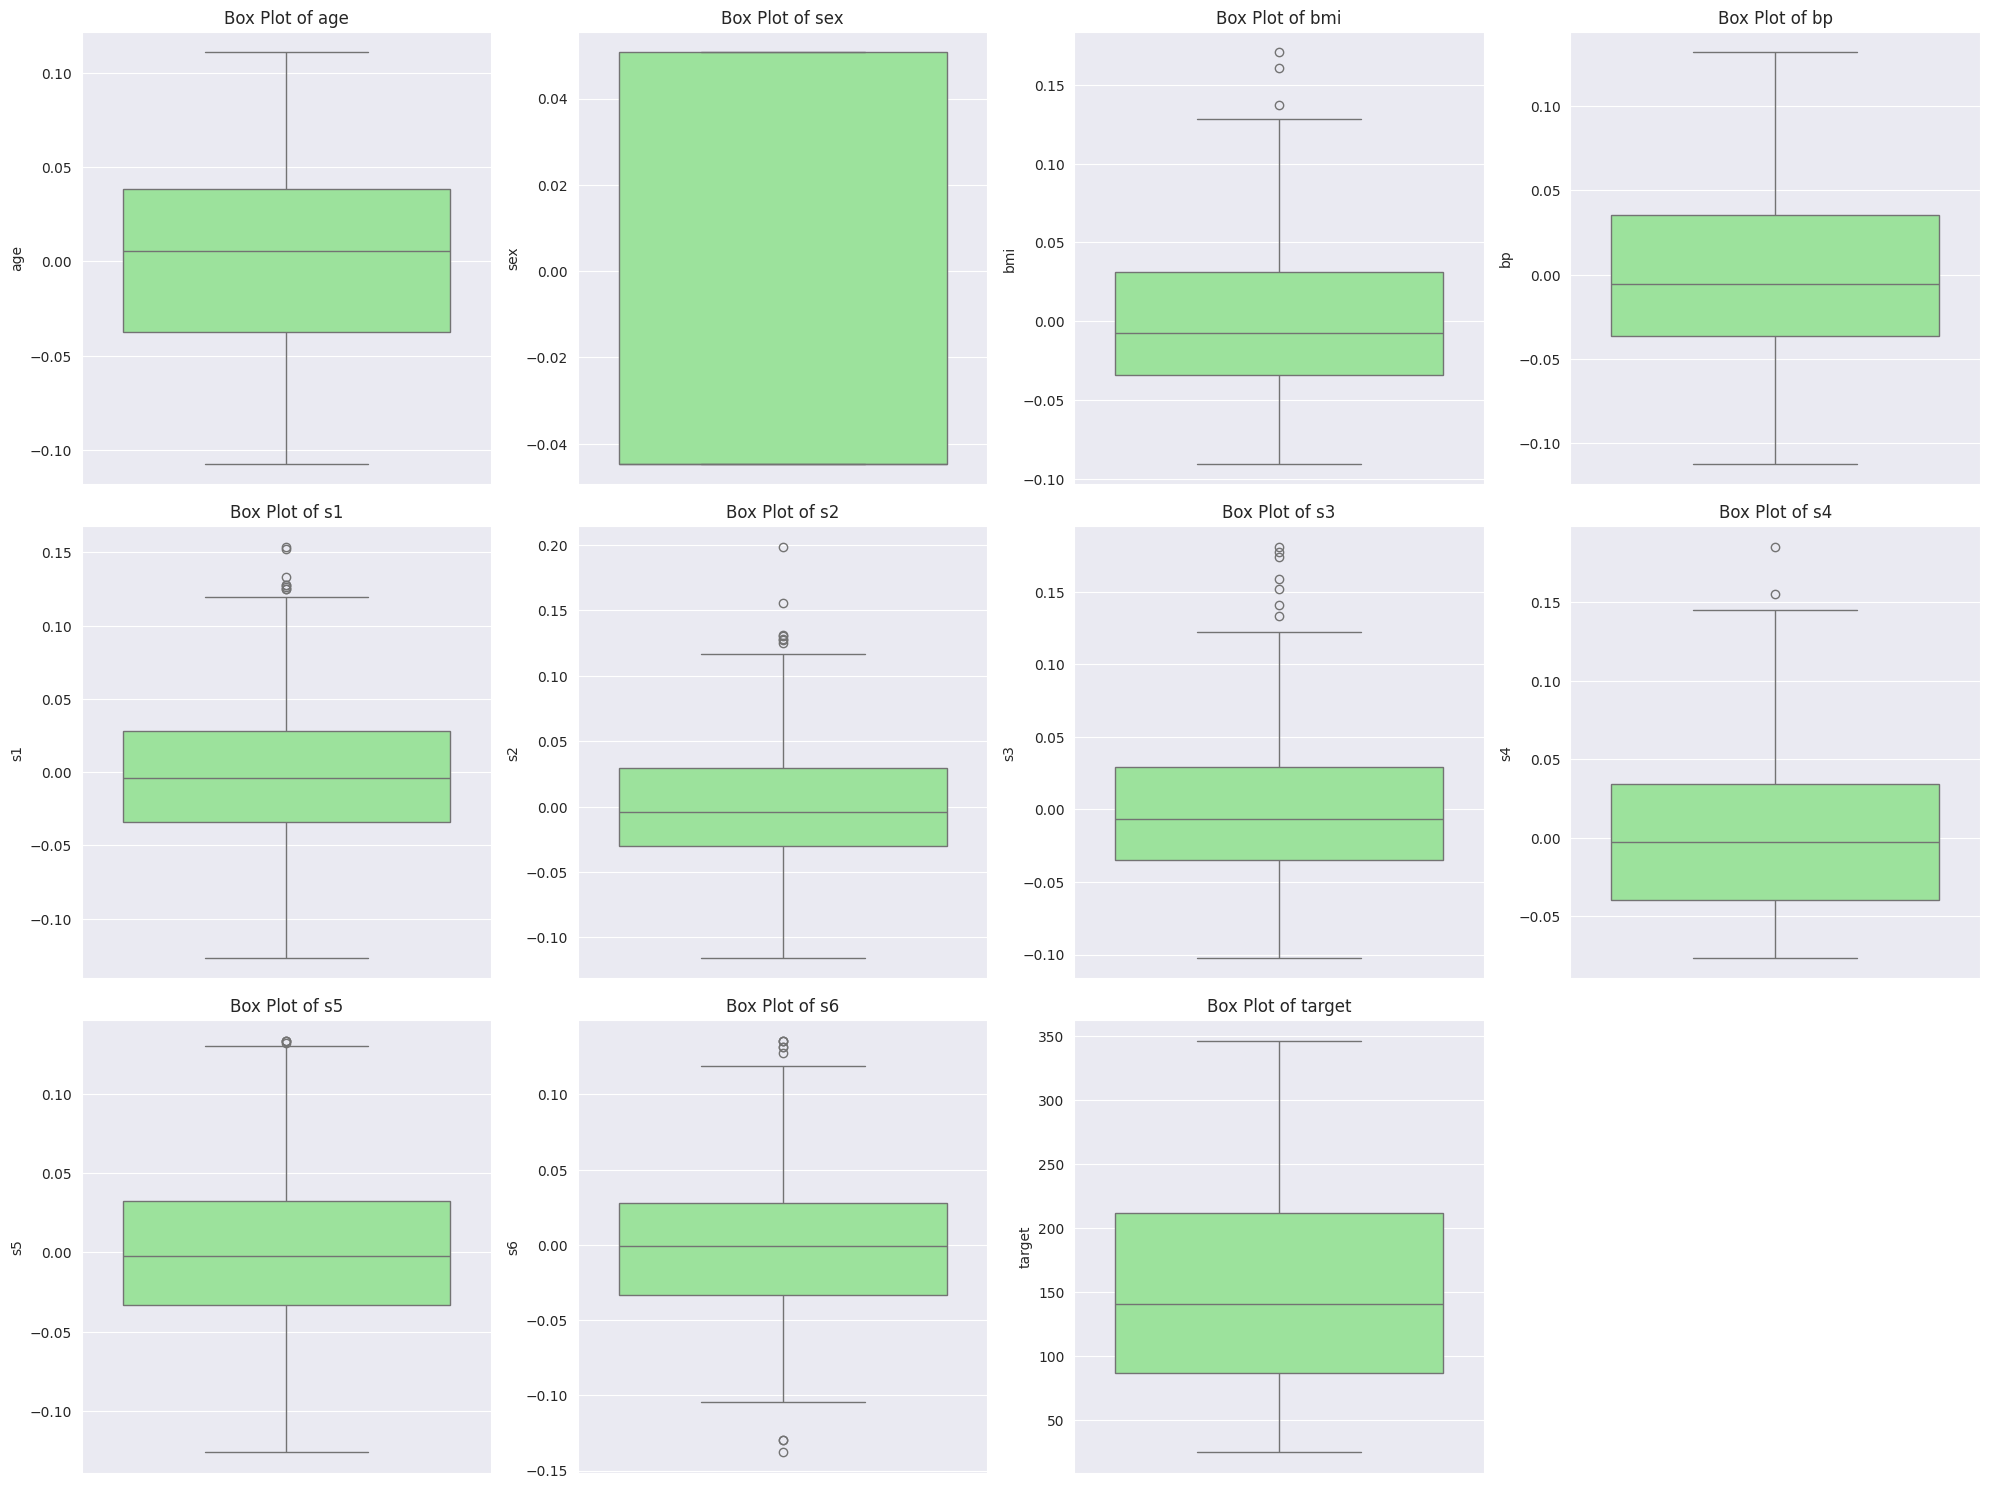

In [510]:
#Boxplot for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

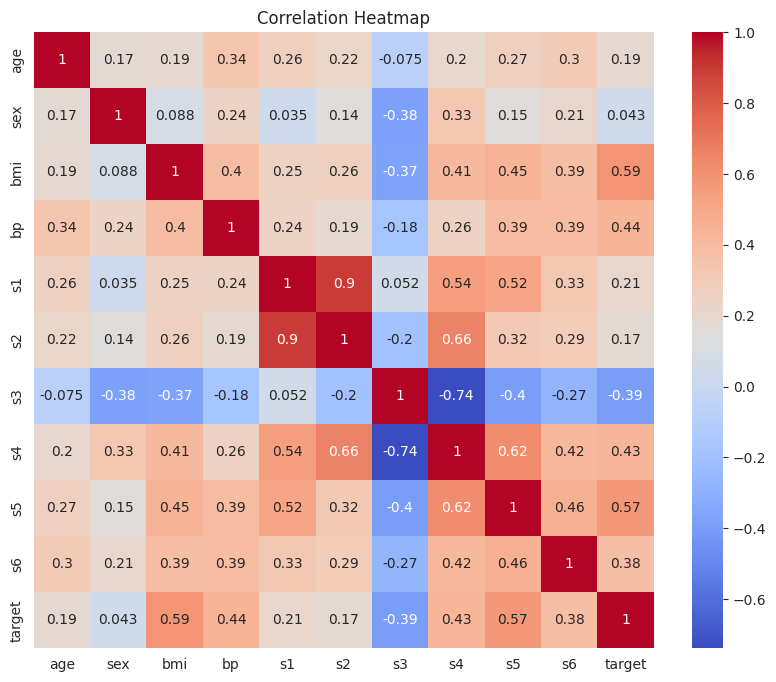

In [511]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

BMI and s5 are highly correlated with the target variable, while sex shows the least correlation, and s3 exhibits a negative correlation.

In [512]:
for col_name in df.columns:
  print(f"{col_name} | Skewness: {round(df[col_name].skew(), 2)}")

age | Skewness: -0.23
sex | Skewness: 0.13
bmi | Skewness: 0.6
bp | Skewness: 0.29
s1 | Skewness: 0.38
s2 | Skewness: 0.44
s3 | Skewness: 0.8
s4 | Skewness: 0.74
s5 | Skewness: 0.29
s6 | Skewness: 0.21
target | Skewness: 0.44


BMI, s3, s4 show moderate positive skewness while other features are approximately symmetric. No transformation was needed.

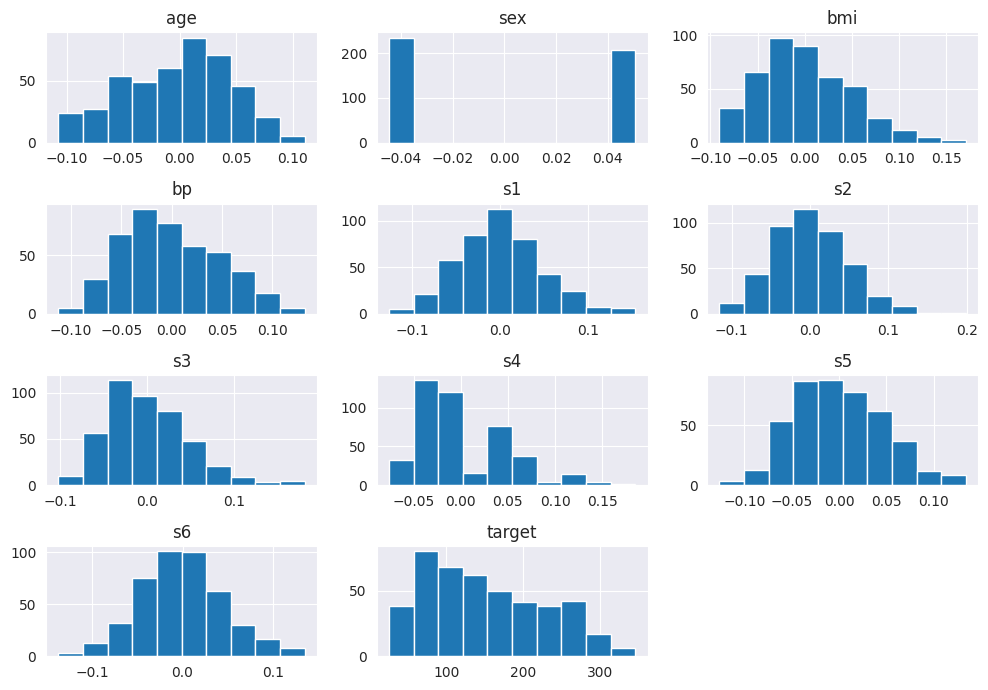

In [513]:
# Histogram
df.hist(figsize=(10, 7))
plt.tight_layout()
plt.show()


Although the features are approximately standardized, StandardScaler was applied to maintain consistency in ANN training.

In [514]:
# split target and features
X = df.drop('target', axis=1)
y = df['target']


In [515]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [516]:
#  ANN Model

base_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile
base_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

base_model.summary()


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)               │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [517]:
# Train the Base Model
history_base_model = base_model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=1
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 30629.6562 - mse: 30629.6562 - val_loss: 22480.4648 - val_mse: 22480.4648
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31545.8105 - mse: 31545.8105 - val_loss: 22468.8145 - val_mse: 22468.8145
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31526.8184 - mse: 31526.8184 - val_loss: 22456.5410 - val_mse: 22456.5410
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 32149.4355 - mse: 32149.4355 - val_loss: 22443.1523 - val_mse: 22443.1523
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 33185.5391 - mse: 33185.5391 - val_loss: 22428.0273 - val_mse: 22428.0273
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29606.5371 - mse: 29606.5371 - val_loss: 22411.5801 - val_mse: 22411.5801
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30292.5312 - mse: 30292.5312 - val_loss: 22393.0801 - val_mse: 22393.0801
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 33938.4180 - mse: 

In [518]:
# Predictions
y_pred = base_model.predict(X_test)

# Evaluation metrics
mse_base = mean_squared_error(y_test, y_pred)
r2_base = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_base)
print("R2 Score:", r2_base)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Mean Squared Error: 16306.133807784574
R2 Score: -2.07770229728698


In [519]:
from tensorflow.keras.callbacks import EarlyStopping

In [520]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [521]:
# Train the Improved Model
improved_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),     # added a dense layer
    Dropout(0.3),                     # added dropout layer
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

improved_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

improved_model.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [522]:
history_improved_model = improved_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,                # epochs changed to 150
    batch_size=32,
    callbacks=[early_stop],    # added early stop
    verbose=1
)


Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 30321.4160 - mse: 30321.4160 - val_loss: 22474.5000 - val_mse: 22474.5000
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31187.5957 - mse: 31187.5957 - val_loss: 22452.3594 - val_mse: 22452.3594
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29302.1289 - mse: 29302.1289 - val_loss: 22423.3730 - val_mse: 22423.3730
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 32576.9609 - mse: 32576.9609 - val_loss: 22383.6875 - val_mse: 22383.6875
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32582.2988 - mse: 32582.2988 - val_loss: 22328.9570 - val_mse: 22328.9570
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32164.2812 - mse: 32164.2812 - val_loss: 22253.7480 - val_mse: 22253.7480
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 33153.7539 - mse: 33153.7539 - val_loss: 22152.2969 - val_mse: 22152.2969
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30104.8379 - mse: 

In [523]:
# Improved model predictions
y_pred_improved = improved_model.predict(X_test)

# Improved model metrics
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print("Improved Model MSE:", mse_improved)
print("Improved Model R² Score:", r2_improved)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Improved Model MSE: 3629.1083857446642
Improved Model R² Score: 0.31502369920590567


In [524]:
# Comparison
comparison = pd.DataFrame({
    'Model': ['Base ANN', 'Improved ANN'],
    'MSE': [mse_base, mse_improved],
    'R² Score': [r2_base, r2_improved]
})

comparison


,Model,MSE,R² Score
0,Base ANN,16306.133808,-2.077702
1,Improved ANN,3629.108386,0.315024


The improved model performs much better than the base model, with an MSE of 3629 and an R² score of 0.31.